In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
iterations = [
    {
        "iteration": 0,
        "chunk_tasks": [0, 1, 2],
        "proposed_function": "filter_recipes",
        "refinements": [
            {"version": 0, "results": {0: True, 1: False, 2: False}},
            {"version": 1, "results": {0: False, 1: False, 2: False}},
            {"version": 2, "results": {0: True, 1: False, 2: False}},
            {"version": 3, "results": {0: True, 1: True, 2: False}},
            {"version": 3, "results": {0: True, 1: False, 2: False}},
        ],
        "added_to_library": False,
        "test_results": {"passed": 0, "failed": 21, "error": 21},
    },
    {
        "iteration": 1,
        "chunk_tasks": [3,4,5],
        "proposed_function": "filter_recipes_by_criteria",
        "refinements": [
            {"version": 0, "results": {3: True, 4: True, 5: True}},
        ],
        "added_to_library": True,
        "test_results": {"passed": 15, "failed": 6, "error": 0},
    },
    {
        "iteration": 2,
        "chunk_tasks": [6,7,8],
        "proposed_function": "extract_recipe_main_ingrediants",
        "refinements": [
            {"version": 0, "results": {6: True, 7: True, 8: False}},
            {"version": 1, "results": {6: True, 7: True, 8: True}},
        ],
        "added_to_library": True,
        "test_results": {"passed": 7, "failed": 14, "error": 3},
    },
    {
        "iteration": 3,
        "chunk_tasks": [9,10,11],
        "proposed_function": "extract_recipe_from_collection",
        "refinements": [
            {"version": 0, "results": {9: True, 10: False, 11: False}},
            {"version": 1, "results": {9: True, 10: False, 11: False}},
            {"version": 2, "results": {9: True, 10: False, 11: False}},
            {"version": 3, "results": {9: True, 10: False, 11: False}},
            {"version": 3, "results": {9: True, 10: False, 11: False}},
        ],
        "added_to_library": False,
        "test_results": {"passed": 0, "failed": 21, "error": 21},
    },
    {
        "iteration": 4,
        "chunk_tasks": [12,13,14],
        "proposed_function": "extract_nutrient_amount",
        "refinements": [
            {"version": 1, "results": {12: True, 13: True, 14: True}},
        ],
        "added_to_library": True,
        "test_results": {"passed": 12, "failed": 9, "error": 1},
    },
    {
        "iteration": 5,
        "chunk_tasks": [15,16,17],
        "proposed_function": "get_latest_recipe_review",
        "refinements": [
            {"version": 1, "results": {15: True, 16: True, 17: True}},
        ],
        "added_to_library": True,
        "test_results": {"passed": 7, "failed": 14, "error": 3},
    },
    {
        "iteration": 6,
        "chunk_tasks": [18,19,20],
        "proposed_function": "count_recipe_ingredients",
        "refinements": [
            {"version": 1, "results": {18: True, 19: True, 20: True}},
        ],
        "added_to_library": True,
        "test_results": {"passed": 7, "failed": 14, "error": 2},
    },
    {
        "iteration": 7,
        "chunk_tasks": [21,22,23],
        "proposed_function": "get_quickest_matching_recipe",
        "refinements": [
            {"version": 1, "results": {21: True, 22: True, 23: True}},
        ],
        "added_to_library": True,
        "test_results": {"passed": 9, "failed": 12, "error": 3},
    },
]


In [ ]:
def test_task_performance(iterations):
    
    test_passes = [i["test_results"]["passed"] for i in iterations]
    test_fails = [i["test_results"]["failed"] for i in iterations]
    iters = list(range(1, len(iterations) + 1))

    plt.figure(figsize=(10, 5))
    plt.plot(iters, test_passes, label="Test Tasks Passed")
    plt.plot(iters, test_fails, label="Test Tasks Failed")
    plt.xlabel("Iteration")
    plt.ylabel("Test Task Count")
    plt.title("Test Task Performance Over Iterations")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [24]:
def refinement_per_function(iterations):
    func_names = [f"Iter {i['iteration']}" for i in iterations]
    refinement_counts = [len(i["refinements"]) for i in iterations]

    plt.figure(figsize=(12, 6))
    plt.bar(func_names, refinement_counts)
    plt.xlabel("Function (Iteration)")
    plt.ylabel("Number of Refinement Steps")
    plt.title("Refinement Steps Needed per Function Proposal")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()

In [ ]:
def success_rate_over_time(iterations):
    success = [1 if i["added_to_library"] else 0 for i in iterations]
    cumulative = pd.Series(success).cumsum()
    iterations_num = list(range(1, len(iterations) + 1))

    plt.plot(iterations_num, cumulative, label="Cumulative Successful Proposals")
    plt.plot(iterations_num, range(1, len(iterations) + 1), label="Total Proposals")
    plt.xlabel("Iteration")
    plt.ylabel("Count")
    plt.title("Function Proposal Success Over Time")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [8]:
def refinement_trajectories_table(iterations):
    print("\nSample Refinement Trajectories:")
    for i in iterations:
        print(f"\nIteration {i['iteration']}, Proposed: {i['proposed_function']}")
        for step in i["refinements"]:
            result_str = ", ".join(f"{task}={'✓' if res else '✗'}" for task, res in step["results"].items())
            print(f"  v{step['version']}: {result_str}")
        print(f"  Added to Library: {i['added_to_library']}")
        print(f"  Test Passed: {i['test_results']['passed']}, Failed: {i['test_results']['failed']}")

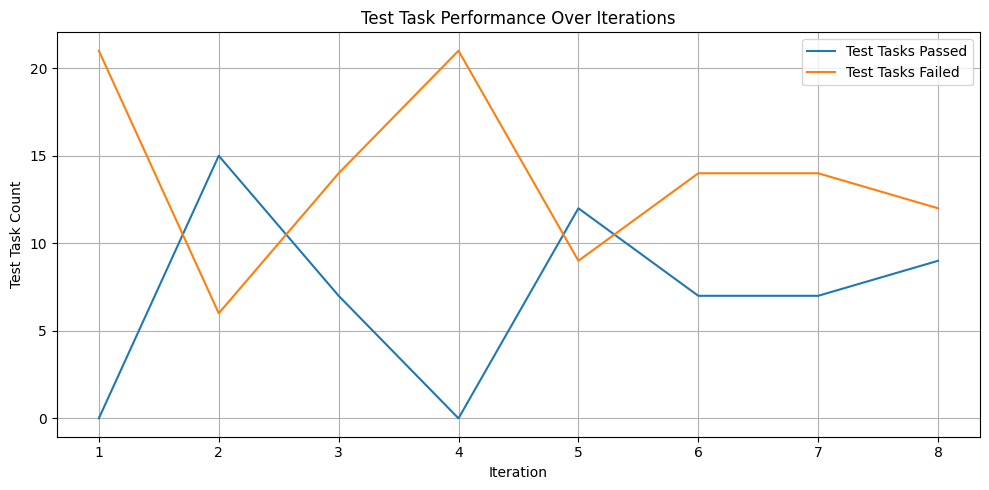

In [20]:
test_task_performance(iterations)

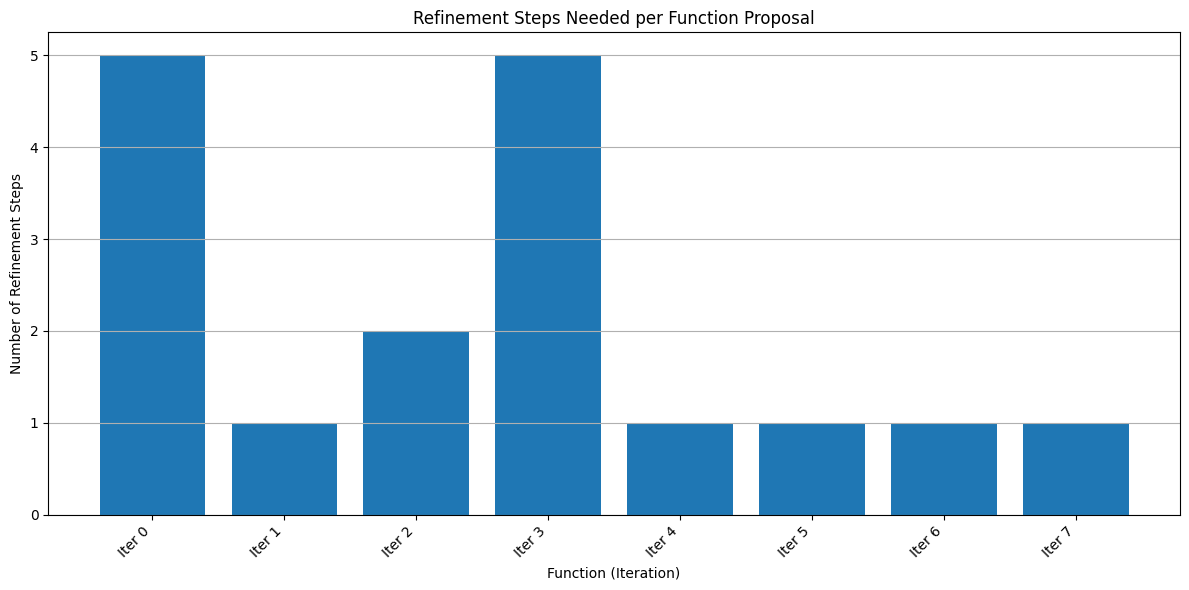

In [25]:
refinement_per_function(iterations)

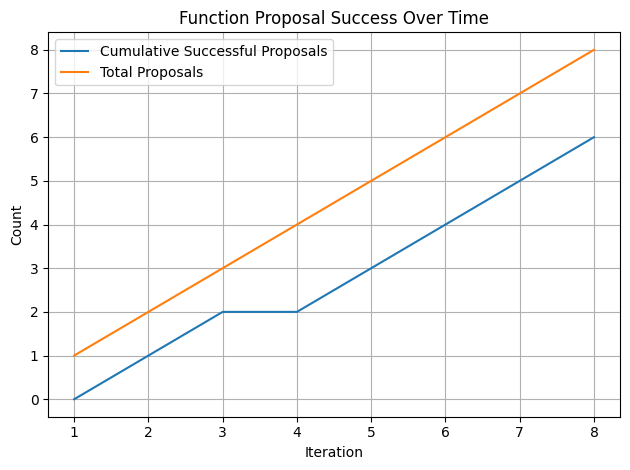

In [12]:
success_rate_over_time(iterations)

In [27]:
refinement_trajectories_table(iterations)


Sample Refinement Trajectories:

Iteration 0, Proposed: filter_recipes
  v0: 0=✓, 1=✗, 2=✗
  v1: 0=✗, 1=✗, 2=✗
  v2: 0=✓, 1=✗, 2=✗
  v3: 0=✓, 1=✓, 2=✗
  v3: 0=✓, 1=✗, 2=✗
  Added to Library: False
  Test Passed: 0, Failed: 21

Iteration 1, Proposed: filter_recipes_by_criteria
  v0: 3=✓, 4=✓, 5=✓
  Added to Library: True
  Test Passed: 15, Failed: 6

Iteration 2, Proposed: extract_recipe_main_ingrediants
  v0: 6=✓, 7=✓, 8=✗
  v1: 6=✓, 7=✓, 8=✓
  Added to Library: True
  Test Passed: 7, Failed: 14

Iteration 3, Proposed: extract_recipe_from_collection
  v0: 9=✓, 10=✗, 11=✗
  v1: 9=✓, 10=✗, 11=✗
  v2: 9=✓, 10=✗, 11=✗
  v3: 9=✓, 10=✗, 11=✗
  v3: 9=✓, 10=✗, 11=✗
  Added to Library: False
  Test Passed: 0, Failed: 21

Iteration 4, Proposed: extract_nutrient_amount
  v1: 12=✓, 13=✓, 14=✓
  Added to Library: True
  Test Passed: 12, Failed: 9

Iteration 5, Proposed: get_latest_recipe_review
  v1: 15=✓, 16=✓, 17=✓
  Added to Library: True
  Test Passed: 7, Failed: 14

Iteration 6, Proposed: cou